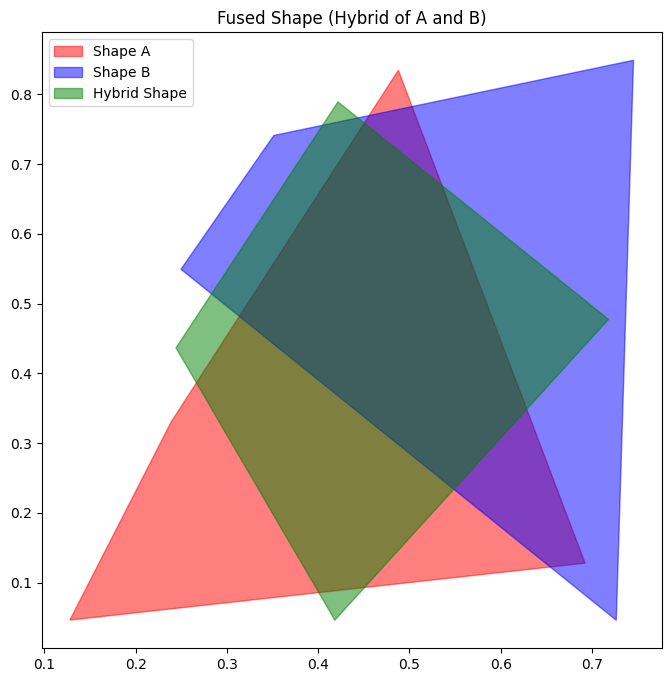

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Function to generate a random convex polygon
def generate_random_shape(num_points=6, size_range=(0.1, 1)):
    # Generate random points within a given size range
    points = np.random.rand(num_points, 2)
    # Scale points to lie within a reasonable size range
    points *= np.random.uniform(size_range[0], size_range[1])
    # Use the convex hull of these points to create a convex polygon
    poly = Polygon(points)
    return poly.convex_hull

# Function to compute centroid and area
def compute_centroid_and_area(shape):
    return shape.centroid, shape.area

# Function to interpolate between two polygons
def interpolate_shapes(shape_a, shape_b, weight_a=0.5):
    # Use shapely unary_union to merge the shapes and find a midpoint
    merged_shape = unary_union([shape_a, shape_b])

    # Create a series of points on the boundary of each polygon
    a_points = np.array(shape_a.exterior.xy).T
    b_points = np.array(shape_b.exterior.xy).T

    # Interpolate between points of the two shapes
    # Here, we interpolate each pair of points with respect to the size of the shapes
    interpolated_points = []

    # Interpolation weight based on the area size of the shapes
    smaller_shape = shape_a if shape_a.area <= shape_b.area else shape_b
    larger_shape  = shape_b if shape_b.area > shape_a.area else shape_a

    # Weight the interpolation based on the size difference
    weight = smaller_shape.area / (smaller_shape.area + larger_shape.area)

    num_points = min(len(a_points), len(b_points))  # Ensure equal number of points
    for i in range(num_points):
        # Linear interpolation between points of the two shapes
        if(smaller_shape == shape_a):
          interpolated_point = (1 - weight) * a_points[i] + weight * b_points[i]
        else:
          interpolated_point = weight * a_points[i] + (1-weight) * b_points[i]

        interpolated_points.append(interpolated_point)

    # Convert list of interpolated points back to a Polygon
    interpolated_points = np.array(interpolated_points)
    return Polygon(interpolated_points)

# Generate two random shapes
shape_a = generate_random_shape(num_points=5)
shape_b = generate_random_shape(num_points=5)

# Interpolate the two shapes
result_shape = interpolate_shapes(shape_a, shape_b)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the first and second shapes
x_a, y_a = shape_a.exterior.xy
x_b, y_b = shape_b.exterior.xy
ax.fill(x_a, y_a, alpha=0.5, label="Shape A", color='red')
ax.fill(x_b, y_b, alpha=0.5, label="Shape B", color='blue')

# Plot the interpolated shape
x_res, y_res = result_shape.exterior.xy
ax.fill(x_res, y_res, alpha=0.5, label="Hybrid Shape", color='green')

# Set labels and title
ax.set_title("Fused Shape (Hybrid of A and B)")
ax.legend()

plt.show()
